In [120]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [121]:
# 读取数据
# path to where the data lies
dpath = '../data/'
train = pd.read_csv(dpath +"incomeClassTrain.csv")
train.head()

,Age,workclass,People,Education,EduNum,Marriage,WorkType,Family,Race,Sex,capitalgain,capitalloss,hours,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [122]:
train.info

<bound method DataFrame.info of        Age          workclass  People      Education  EduNum  \
0       39          State-gov   77516      Bachelors      13   
1       50   Self-emp-not-inc   83311      Bachelors      13   
2       38            Private  215646        HS-grad       9   
3       53            Private  234721           11th       7   
4       28            Private  338409      Bachelors      13   
5       37            Private  284582        Masters      14   
6       49            Private  160187            9th       5   
7       52   Self-emp-not-inc  209642        HS-grad       9   
8       31            Private   45781        Masters      14   
9       42            Private  159449      Bachelors      13   
10      37            Private  280464   Some-college      10   
11      30          State-gov  141297      Bachelors      13   
12      23            Private  122272      Bachelors      13   
13      32            Private  205019     Assoc-acdm      12   
14      

In [123]:
## 各属性的统计特性
train.describe()

,Age,People,EduNum,capitalgain,capitalloss,hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [124]:
#Map each column's String values to be number as per index of the unique values.
import sys
sys.path.append("..")
import CommonUtils

train["workclass"]  = mapColumnToNum(train, "workclass")
train["workclass"]

train["Education"]  = mapColumnToNum(train, "Education")
train["Marriage"]  = mapColumnToNum(train, "Marriage")
train["WorkType"]  = mapColumnToNum(train, "WorkType")
train["Family"]  = mapColumnToNum(train, "Family")
train["Race"]  = mapColumnToNum(train, "Race")
train["Sex"]  = mapColumnToNum(train, "Sex")
train["Country"]  = mapColumnToNum(train, "Country")
train["Income"]  = mapColumnToNum(train, "Income")

train.to_csv("../data/incomeClassTrainMapped.csv",encoding='utf-8')

In [125]:
train.head()

,Age,workclass,People,Education,EduNum,Marriage,WorkType,Family,Race,Sex,capitalgain,capitalloss,hours,Country,Income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [126]:
y_train = train["Income"]

train = train.drop(["Income"], axis=1)
X_train = np.array(train)
X_train

array([[    39,      0,  77516, ...,      0,     40,      0],
       [    50,      1,  83311, ...,      0,     13,      0],
       [    38,      2, 215646, ...,      0,     40,      0],
       ...,
       [    58,      2, 151910, ...,      0,     40,      0],
       [    22,      2, 201490, ...,      0,     20,      0],
       [    52,      6, 287927, ...,      0,     40,      0]])

In [127]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_train

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.03067056, -1.88460023, -1.06361075, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [ 0.83710898, -1.0687461 , -1.008707  , ..., -0.21665953,
        -2.22215312, -0.25574647],
       [-0.04264203, -0.25289198,  0.2450785 , ..., -0.21665953,
        -0.03542945, -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.35877741, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [-1.21564337, -0.25289198,  0.11095988, ..., -0.21665953,
        -1.65522476, -0.25574647],
       [ 0.98373415,  3.01052452,  0.92989258, ..., -0.21665953,
        -0.03542945, -0.25574647]])

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.08, 0.1, 0.2, 0.3, 1, 10, 80]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.08, 0.1, 0.2, 0.3, 1, 10, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
grid.cv_results_

/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/python36/lib/python3.6/site-p

{'mean_fit_time': array([0.03854208, 0.0574255 , 0.03802185, 0.05899553, 0.04267025,
        0.0735055 , 0.05355268, 0.08406916, 0.05616403, 0.08708606,
        0.04336476, 0.07806125, 0.04479604, 0.06251745, 0.04807734,
        0.07395425, 0.04701762, 0.07631454]),
 'std_fit_time': array([0.02214899, 0.00604922, 0.00483138, 0.01228555, 0.011398  ,
        0.00961734, 0.00550253, 0.00449443, 0.00537566, 0.01252379,
        0.00346694, 0.00696969, 0.01008025, 0.00871616, 0.0022275 ,
        0.00459254, 0.01190776, 0.00932714]),
 'mean_score_time': array([0.00104346, 0.00106597, 0.00100679, 0.00091524, 0.00097995,
        0.00088401, 0.00190806, 0.00123916, 0.00393577, 0.00208297,
        0.00114036, 0.00102487, 0.00095706, 0.00099487, 0.00197468,
        0.00088997, 0.00110211, 0.00119767]),
 'std_score_time': array([3.05420494e-04, 3.23525772e-04, 2.47508867e-04, 2.38109073e-04,
        2.94658990e-04, 4.86388861e-05, 8.77681776e-04, 4.78694650e-04,
        5.70357065e-03, 1.56727460e-

In [130]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8258652989773041
{'C': 0.08, 'penalty': 'l1'}


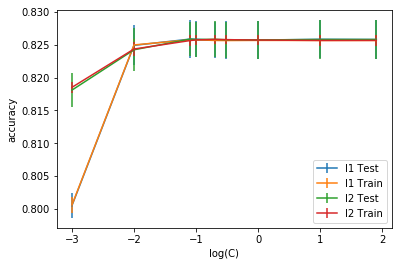

In [131]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

# plot results
number_C = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(number_C,number_penaltys)
train_scores = np.array(train_means).reshape(number_C,number_penaltys)
test_stds = np.array(test_stds).reshape(number_C,number_penaltys)
train_stds = np.array(train_stds).reshape(number_C,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )

pyplot.show()